**Hipótese 1: Músicas com BPM mais altos fazem mais sucesso em termos de número de streams no Spotify.**

Conclusão: Após análise e validação, constatou-se que essa hipótese não se confirma, sendo assim, foi refutada.

In [2]:
# CORRELAÇÃO PARA A HIPÓTESE 1

import pandas as pd

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

X = df['bpm']
y = df['streams']

correlacao_bpm_streams = X.corr(y)

print("Correlação entre BPM e streams:", correlacao_bpm_streams)

Correlação entre BPM e streams: -0.0009444636534078218


In [3]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 1 (BPM MAIS ALTOS TEM MAIS STREAMS)

import pandas as pd
from scipy.stats import mannwhitneyu

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

# Separe os dados em grupos 'alto' e 'baixo'
alta_group = df[df['bpm_categoria'] == 'alta']['streams']
baixa_group = df[df['bpm_categoria'] == 'baixa']['streams']


# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')


# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")


# Verifique se o p-value é significativo (por exemplo, menor que 0.05)
if p_value < 0.05:
    print("A diferença entre os grupos 'alto' e 'baixo' da característica bpm é estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 'alto' e 'baixo' da característica bpm.")

Mann-Whitney U statistic: 106580.5000
P-value: 0.2086
Não há diferença estatisticamente significativa entre os grupos 'alto' e 'baixo' da característica bpm.


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0008421
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.977
Time:                        21:47:58   Log-Likelihood:                -20412.
No. Observations:                 946   AIC:                         4.083e+04
Df Residuals:                     944   BIC:                         4.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.169e+08   8.29e+07      6.235      0.0

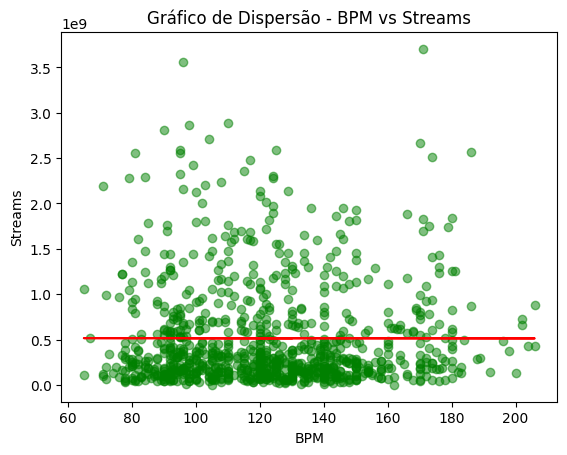

In [5]:
#REGRESSÃO PARA A HIPÓTESE 1 (BPM MAIS ALTOS TEM MAIS STREAMS)

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Carregar os dados
df = pd.read_csv('/content/dados_spotify_categorizados.csv')

# Remover linhas com valores ausentes
df = df.dropna(subset=['bpm', 'streams'])

# Selecionar as variáveis independentes (X) e dependente (y)
X = df[['bpm']]  # Variável independente (bpm)
y = df['streams']  # Variável dependente (streams)

# Adicionar uma constante ao X (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Imprimir o resumo do modelo
print(model.summary())

# Plotar o gráfico de dispersão
plt.scatter(df['bpm'], df['streams'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gráfico de Dispersão - BPM vs Streams')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.plot(df['bpm'], model.predict(X), color='red')  # Mantido vermelho
plt.show()


**Hipótese 2: Músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas, como a Deezer e Apple**

Conclusão: Após uma análise dos resultados, identificou-se que esta hipótese foi confirmada.

In [6]:
# CORRELAÇÃO PARA A HIPÓTESE 2

import pandas as pd

df = pd.read_csv('/content/dados_spotify_categorizados.csv')
X1 = df['in_spotify_charts']
X2 = df['in_apple_charts']
y = df['in_deezer_charts']

# Calculando a correlação entre in_spotify_charts e in_deezer_charts
correlacao_spotify_deezer = X1.corr(y)

# Calculando a correlação entre in_spotify_charts e in_apple_charts
correlacao_spotify_apple = X1.corr(X2)

print("Correlação entre Spotify e Deezer:", correlacao_spotify_deezer)
print("Correlação entre Spotify e Apple:", correlacao_spotify_apple)

Correlação entre Spotify e Deezer: 0.5998983043273003
Correlação entre Spotify e Apple: 0.5519470780242325


In [7]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 2 (MÚSICAS EM SPOTIFY CHARTS X DEMAIS CHARTS)
import scipy.stats as stats
import pandas as pd

# Carregando os dados
dados_spotify_categorizados = pd.read_csv('dados_spotify_categorizados.csv')

# Separando os dados em dois grupos com base na variável in_spotify_charts (DEEZER)
grupo_spotify = dados_spotify_categorizados[dados_spotify_categorizados['in_spotify_charts'] == 1]
grupo_deezer = dados_spotify_categorizados[dados_spotify_categorizados['in_spotify_charts'] == 0]

# Realizando o teste de Mann-Whitney
stat, p_valor = stats.mannwhitneyu(grupo_spotify['in_deezer_charts'], grupo_deezer['in_deezer_charts'])

# Interpretando os resultados
print("Estatística de teste de Mann-Whitney:", stat)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula, ou seja, as distribuições das duas variáveis são diferentes.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula, ou seja, as distribuições das duas variáveis são iguais.")

#Separando os dados em dois grupos com base na variável in_spotify_charts (APPLE)
grupo_spotify = dados_spotify_categorizados[dados_spotify_categorizados['in_spotify_charts'] == 1]
grupo_deezer = dados_spotify_categorizados[dados_spotify_categorizados['in_apple_charts'] == 0]

# Realizando o teste de Mann-Whitney
stat, p_valor = stats.mannwhitneyu(grupo_spotify['in_deezer_charts'], grupo_deezer['in_apple_charts'])

# Interpretando os resultados
print("Estatística de teste de Mann-Whitney:", stat)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula, ou seja, as distribuições das duas variáveis são diferentes.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula, ou seja, as distribuições das duas variáveis são iguais.")


Estatística de teste de Mann-Whitney: 3136.0
Valor p: 0.8068650732810388
Não há evidências suficientes para rejeitar a hipótese nula, ou seja, as distribuições das duas variáveis são iguais.
Estatística de teste de Mann-Whitney: 864.0
Valor p: 0.0005370795243376645
Há evidências suficientes para rejeitar a hipótese nula, ou seja, as distribuições das duas variáveis são diferentes.


                            OLS Regression Results                            
Dep. Variable:       in_deezer_charts   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     530.7
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.55e-93
Time:                        21:50:51   Log-Likelihood:                -2834.3
No. Observations:                 946   AIC:                             5673.
Df Residuals:                     944   BIC:                             5682.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4529      0.18

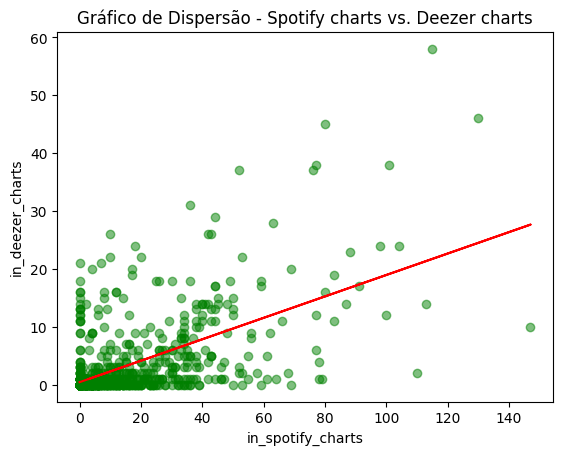

In [8]:
# REGRESSÃO PARA A HIPÓTESE 2 (in_spotify_charts e in_deezer_charts)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

df = df.dropna(subset=['in_spotify_charts', 'in_deezer_charts'])

X = df[['in_spotify_charts']]
y = df['in_deezer_charts']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Plotar o gráfico de dispersão
plt.scatter(df['in_spotify_charts'], df['in_deezer_charts'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gráfico de Dispersão - Spotify charts vs. Deezer charts')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_deezer_charts')
plt.plot(df['in_spotify_charts'], model.predict(X), color='red')  # Mantido vermelho

plt.show()



                            OLS Regression Results                            
Dep. Variable:        in_apple_charts   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     413.6
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.56e-76
Time:                        21:51:57   Log-Likelihood:                -4883.1
No. Observations:                 946   AIC:                             9770.
Df Residuals:                     944   BIC:                             9780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                34.8244      1.61

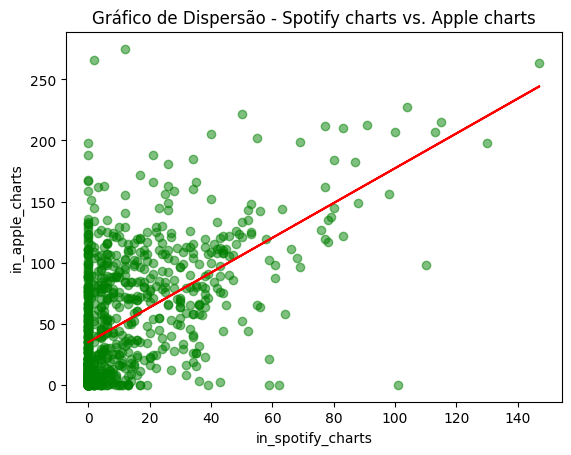

In [9]:
# REGRESSÃO PARA A HIPÓTESE 2 (in_spotify_charts e in_apple_charts)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

df = df.dropna(subset=['in_spotify_charts', 'in_apple_charts'])

X = df[['in_spotify_charts']]
y = df['in_apple_charts']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Plotar o gráfico de dispersão
plt.scatter(df['in_spotify_charts'], df['in_apple_charts'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gráfico de Dispersão - Spotify charts vs. Apple charts')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_apple_charts')
plt.plot(df['in_spotify_charts'], model.predict(X), color='red')  # Mantido vermelho

plt.show()


**Hipótese 3 - A presença de uma música em um maior número de playlists está correlacionada com um maior número de streams.**

Conclusão: Após as análises, confirmou-se que a presença de uma música em um maior número de playlists está, de fato, correlacionada com um aumento significativo no número de streams. Essa relação evidência a importância das playlists como um dos principais impulsionadores de sucesso para as músicas no ambiente de streaming, portanto, essa hipótese foi validada.

In [10]:
# CORRELAÇÃO PARA A HIPÓTESE 3

import pandas as pd

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

X = df['soma_playlists']
y = df['streams']

correlacao_playlists_streams = X.corr(y)

print("Correlação entre músicas em playlists e streams:", correlacao_playlists_streams)

Correlação entre músicas em playlists e streams: 0.7835219461862226


In [11]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 3 (MÚSICA EM PLAYLISTS x STREAMS)

import scipy.stats as stats
import pandas as pd

# Carregando os dados
dados_spotify_categorizados = pd.read_csv('dados_spotify_categorizados.csv')

# Separando os dados em dois grupos com base na variável soma_playlists
grupo_maior_playlists = dados_spotify_categorizados[dados_spotify_categorizados['soma_playlists'] > dados_spotify_categorizados['soma_playlists'].median()]
grupo_menor_playlists = dados_spotify_categorizados[dados_spotify_categorizados['soma_playlists'] <= dados_spotify_categorizados['soma_playlists'].median()]

# Realizando o teste de Mann-Whitney
stat, p_valor = stats.mannwhitneyu(grupo_maior_playlists['streams'], grupo_menor_playlists['streams'])

# Interpretando os resultados
print("Estatística de teste de Mann-Whitney:", stat)
print("Valor p:", p_valor)

if p_valor < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula, ou seja, há diferença significativa entre os grupos.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula, ou seja, não há diferença significativa entre os grupos.")

Estatística de teste de Mann-Whitney: 208049.0
Valor p: 5.763137096202168e-116
Há evidências suficientes para rejeitar a hipótese nula, ou seja, há diferença significativa entre os grupos.


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1501.
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.75e-197
Time:                        21:56:14   Log-Likelihood:                -19961.
No. Observations:                 946   AIC:                         3.993e+04
Df Residuals:                     944   BIC:                         3.994e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.317e+08   1.36e+07     17.

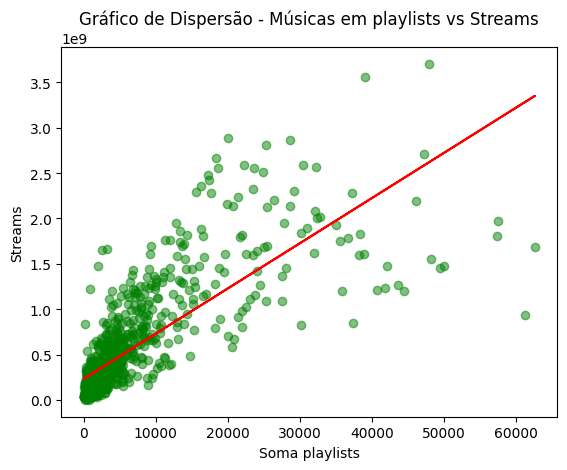

In [12]:
# REGRESSÃO PARA A HIPÓTESE 3 (in_spotify_playlists e streams)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

df = df.dropna(subset=['soma_playlists', 'streams'])

X = df[['soma_playlists']]
y = df['streams']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Plotar o gráfico de dispersão
plt.scatter(df['soma_playlists'], df['streams'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gráfico de Dispersão - Músicas em playlists vs Streams')
plt.xlabel('Soma playlists')
plt.ylabel('Streams')
plt.plot(df['soma_playlists'], model.predict(X), color='red')  # Mantido vermelho

plt.show()


**Hipótese 4 - Artistas com um maior número de músicas no Spotify têm mais streams.**

Conclusão: Após análise realizada, foi validado que esta hipótese se confirma. Os resultados obtidos demonstram uma correlação positiva entre o número de músicas disponíveis de um artista no Spotify e o total de streams acumulados. Essa relação destaca a importância da disponibilidade do catálogo de um artista para o sucesso na plataforma de streaming.

In [13]:
# CORRELAÇÃO PARA A HIPÓTESE 4

import pandas as pd

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

# Agrupando os dados por artista e contando o número de músicas (track_id) e somando os streams
artistas_dados_agrupados = df.groupby('artist_s_name').agg({'track_id': 'count', 'streams': 'sum'})

# Renomeando as colunas
artistas_dados_agrupados.columns = ['num_musicas', 'total_streams']

# Calculando a correlação
correlacao= artistas_dados_agrupados['num_musicas'].corr(artistas_dados_agrupados['total_streams'])

print("Correlação entre o número de músicas por artistas e os streams:", correlacao)

Correlação entre o número de músicas por artistas e os streams: 0.7783651853862555


In [14]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 4 (track_id, artist_name x streams))

import pandas as pd
from scipy.stats import mannwhitneyu

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

# Agrupar os dados pela variável "artist_s_name" e calcular o número de músicas e a soma dos streams
grouped_data = dados_spotify_categorizados.groupby('artist_s_name').agg({'track_id': 'count', 'streams': 'sum'})

# Dividir os dados em dois grupos com base no número de músicas
median_tracks = grouped_data['track_id'].median()
artists_with_more_tracks = grouped_data[grouped_data['track_id'] > median_tracks]
artists_with_less_tracks = grouped_data[grouped_data['track_id'] <= median_tracks]

#Aplicar o teste de Mann-Whitney
statistic, p_value = mannwhitneyu(artists_with_more_tracks['streams'], artists_with_less_tracks['streams'])
print("Estatística de teste de Mann-Whitney:", statistic)
print("Valor p:", p_value)

# Interpretando os resultados
alpha = 0.05
if p_value < alpha:
    print("Há uma diferença significativa nos streams entre os dois grupos.")
else:
    print("Não há evidências suficientes para concluir que há uma diferença significativa nos streams entre os dois grupos.")

Estatística de teste de Mann-Whitney: 46525.0
Valor p: 2.1766266816417917e-28
Há uma diferença significativa nos streams entre os dois grupos.


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     983.8
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.65e-131
Time:                        21:59:09   Log-Likelihood:                -14130.
No. Observations:                 642   AIC:                         2.826e+04
Df Residuals:                     640   BIC:                         2.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.22e+07   4.18e+07      0.531      0.5

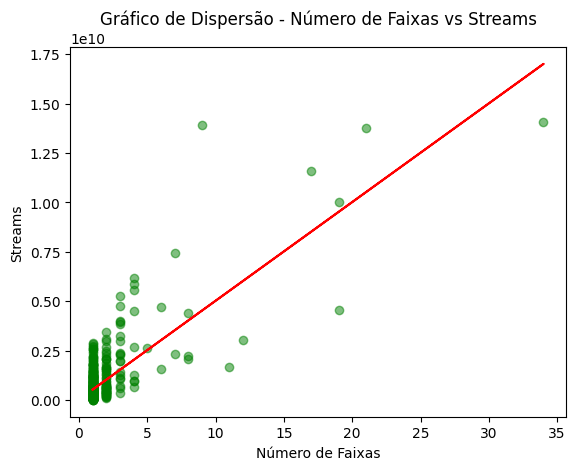

In [15]:
# REGRESSÃO PARA A HIPÓTESE 4 (músicas por artistas e streams)

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

df = df.dropna(subset=['artist_s_name', 'track_id', 'streams'])

df_grouped = df.groupby('artist_s_name').agg({'track_id': 'count', 'streams': 'sum'}).reset_index()

X = df_grouped[['track_id']]
y = df_grouped['streams']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(df_grouped['track_id'], df_grouped['streams'], alpha=0.5, color='green')  # Alterado para verde
plt.title('Gráfico de Dispersão - Número de Faixas vs Streams')
plt.xlabel('Número de Faixas')
plt.ylabel('Streams')
plt.plot(df_grouped['track_id'], model.predict(X), color='red')  # Mantido vermelho
plt.show()


**Hipótese 5 - As características da música influenciam o sucesso em termos de número de streams no Spotify**

Conclusão: Na análise de correlação, observamos que todas as características das músicas demonstraram uma correlação negativa fraca, sugerindo que essas variáveis podem não ter uma influência significativa nos streams. No entanto, durante o teste de significância, foi observada uma diferença significativa apenas na variável "speechiness". Já no teste de regressão, foram identificadas diferenças significativas em "speechiness" e "danceability". Portanto, concluiu- se que a hipótese foi parcialmente validada.

In [16]:
# CORRELAÇÃO PARA A HIPÓTESE 5

import pandas as pd

df = pd.read_csv('/content/dados_spotify_categorizados.csv')

colunas = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'streams']
dados_selecionados = df[colunas]

# Calculando a matriz de correlação
matriz_correlacao = dados_selecionados.corr()

# Extraindo apenas as correlações com os streams
correlacoes_streams = matriz_correlacao['streams']

print("Correlação entre as variáveis e os streams:")
print(correlacoes_streams)

Correlação entre as variáveis e os streams:
danceability__       -0.106253
valence__            -0.040194
energy__             -0.025049
acousticness__       -0.004940
instrumentalness__   -0.044230
liveness__           -0.049049
speechiness__        -0.112587
streams               1.000000
Name: streams, dtype: float64


In [17]:
# TESTE DE MANN-WHITNEY PARA TESTAR A HIPÓTESE 5 (CARACTERÍSTICAS DAS MÚSICAS EM RELAÇÃO A STREAMS ALTO E BAIXO)

import pandas as pd
from scipy.stats import mannwhitneyu

# Importando os dados da planilha "dados_spotify_categorizados"
df = pd.read_csv('/content/dados_spotify_categorizados.csv')

# Variáveis que quero comparar
variaveis = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

# Dicionário para armazenar os p-valores para cada variável
p_values = {}

for var in variaveis:
# Separe os dados em categorias 'alta' e 'baixa' para cada variável
    alta_group = df[df[f'{var}_categoria'] == 'alta']['streams']
    baixa_group = df[df[f'{var}_categoria'] == 'baixa']['streams']

# Teste de Mann-Whitney U
    estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Armazenando o p-valor no dicionário
    p_values[var] = p_value

# p-valor para cada variável
for var, p_value in p_values.items():
    print(f"P-value para {var}: {p_value:.4f}")

# Condições para cada p-valor
    if p_value < 0.05:
        print(f"A diferença nas medianas de streams entre os grupos 'alto' e 'baixo' da característica {var} é estatisticamente significativa.")
    else:
        print(f"Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica {var}.")

P-value para danceability: 0.0946
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica danceability.
P-value para valence: 0.2711
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica valence.
P-value para energy: 0.2681
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica energy.
P-value para acousticness: 0.0967
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica acousticness.
P-value para instrumentalness: 0.2740
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica instrumentalness.
P-value para liveness: 0.6137
Não há diferença estatisticamente significativa nas medianas de streams entre os grupos 'alto' e 'baixo' da característica livene

In [19]:
# REGRESSÃO PARA A HIPÓTESE 5 (características das músicas e streams)

import pandas as pd
import statsmodels.api as sm

# Carregar os dados
df = pd.read_csv('/content/dados_spotify_categorizados.csv')

# Remover linhas com valores ausentes
df = df.dropna(subset=['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'streams'])

# Selecionar as variáveis independentes (X) e dependente (y)
X = df[['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']]  # Variáveis independentes
y = df['streams']  # Variável dependente (streams)

# Adicionar uma constante ao X (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Salvar o resumo do modelo em um arquivo de texto
with open('model_summary.txt', 'w') as f:
    f.write(model.summary().as_text())

# Ler o conteúdo do arquivo e substituir a cor azul pela cor verde
with open('model_summary.txt', 'r') as f:
    summary_text = f.read()

# Substituir a cor azul pela cor verde
summary_text = summary_text.replace('blue', 'green')

# Imprimir o resumo do modelo com a cor verde
print(summary_text)


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.036
Date:                Thu, 02 May 2024   Prob (F-statistic):           0.000228
Time:                        22:02:56   Log-Likelihood:                -20398.
No. Observations:                 946   AIC:                         4.081e+04
Df Residuals:                     938   BIC:                         4.085e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.928e+08   1.39

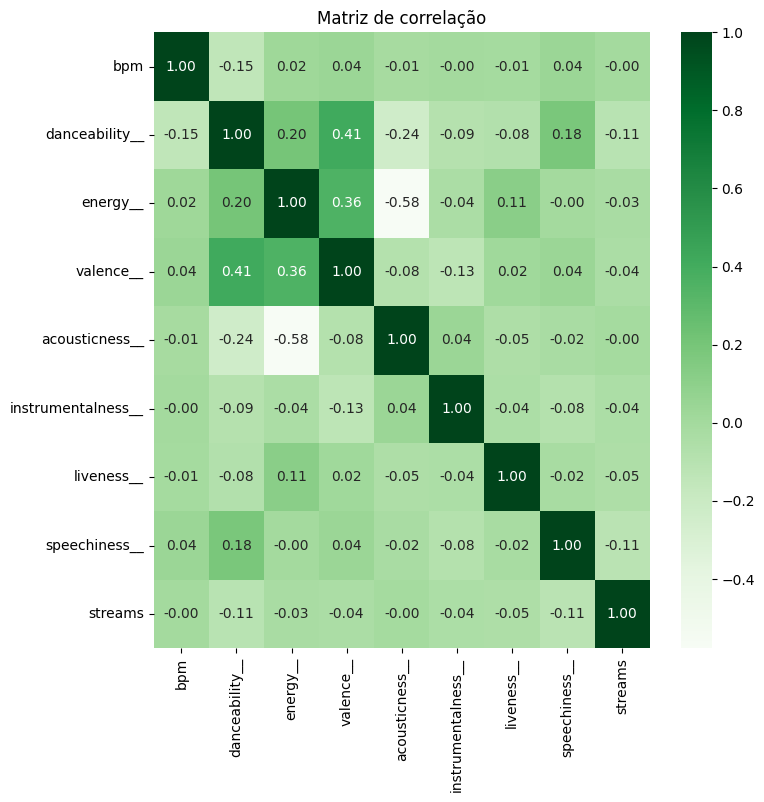

In [20]:
#MATRIZ DE CORRELAÇÃO

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando os dados da planilha "dados_spotify_categorizados"
df = pd.read_csv('/content/dados_spotify_categorizados.csv')

# Selecionando as colunas relevantes para calcular a matriz de correlação
cols = ['bpm', 'danceability__', 'energy__', 'valence__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'streams']
correlation_matrix = df[cols].corr()

# Mapa de calor
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')  # Alterado para mapa de cores 'Greens'
plt.title('Matriz de correlação')
plt.show()


In [21]:
#MÉDIA, MEDIANA E DESVIO PADRÃO DE VARIÁVEIS

import pandas as pd

dados_spotify = pd.read_csv('dados_spotify_categorizados.csv')

variaveis_interesse = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists','soma_playlists', 'streams', 'bpm', 'danceability__', 'energy__', 'valence__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__']

# Calcular média, mediana e desvio padrão
estatisticas = dados_spotify[variaveis_interesse].agg(['mean', 'median', 'std'])

# Transpor o DataFrame para que as estatísticas sejam as colunas
estatisticas = estatisticas.transpose()

estatisticas = estatisticas.rename(index=str, columns={"mean": "Média", "median": "Mediana", "std": "Desvio Padrão"})

print(estatisticas)

                             Média      Mediana  Desvio Padrão
in_spotify_playlists  5.222712e+03       2225.0   7.920647e+03
in_deezer_playlists   3.874873e+02         44.0   1.134357e+03
in_apple_playlists    6.804651e+01         34.0   8.657625e+01
soma_playlists        5.678246e+03       2310.5   8.941158e+03
streams               5.145268e+08  287690252.0   5.683890e+08
bpm                   1.223901e+02        120.0   2.801740e+01
danceability__        6.698414e+01         69.0   1.465486e+01
energy__              6.421776e+01         66.0   1.657062e+01
valence__             5.134144e+01         51.0   2.352067e+01
acousticness__        2.718710e+01         18.0   2.604591e+01
instrumentalness__    1.571882e+00          0.0   8.418650e+00
liveness__            1.816385e+01         12.0   1.370689e+01
speechiness__         1.016068e+01          6.0   9.942351e+00


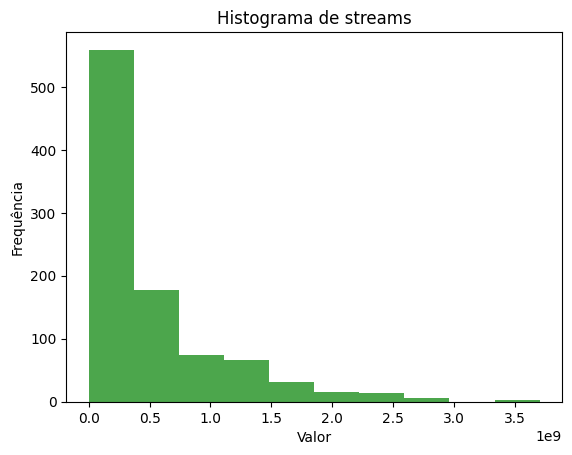

In [22]:
# HISTOGRAMA STREAMS

import matplotlib.pyplot as plt
import pandas as pd

dados_spotify = pd.read_csv('dados_spotify_categorizados.csv')

streams = dados_spotify['streams']

# Plotar o histograma
plt.hist(streams, bins=10, color='green', alpha=0.7)  # Alterado para a cor verde
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma de streams')

plt.show()


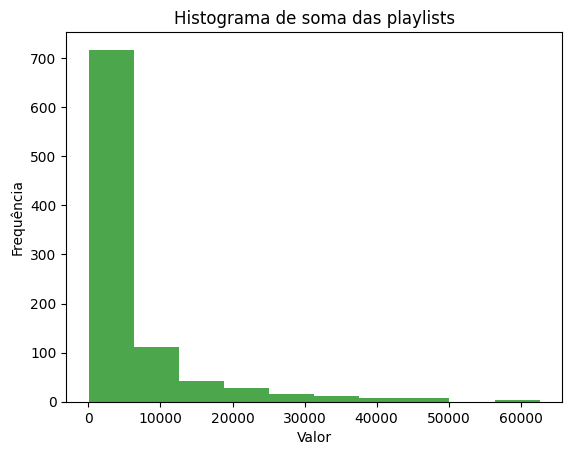

In [23]:
# HISTOGRAMA SOMA_PLAYLISTS

import matplotlib.pyplot as plt
import pandas as pd

dados_spotify = pd.read_csv('dados_spotify_categorizados.csv')

streams = dados_spotify['soma_playlists']

# Plotar o histograma
plt.hist(streams, bins=10, color='green', alpha=0.7)  # Alterado para a cor verde
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma de soma das playlists')

plt.show()
